# Number Classification Application

![Task.png](https://i.postimg.cc/7hSp2h81/Task.png)

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
X = digits.data
y = digits.target
print('Shape of Input data is = ',X.shape)

Shape of Input data is =  (1797, 64)


There are **1,797** images and each image is 8 x 8 and that is reshaped into 1-D

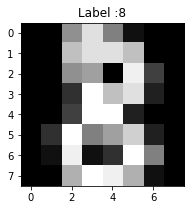

In [4]:
label=8
plt.figure(figsize=(3,3))
plt.imshow(X[label:label+1].reshape((8,8,)),cmap='gray')
plt.title('Label :%s'%(y[label]))
plt.show()


# Split Data
- train data -> 70%
- test data -> 30 %


In [5]:
from sklearn.cross_validation import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((1257, 64), (1257,), (540, 64), (540,))

# TRAIN MODEL

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
print('INFO: Model Trained Sucessfully...')

INFO: Model Trained Sucessfully...


### Test Model with test data

In [7]:
y_pred = model.predict(x_test)

In [8]:
import pandas_ml as pm

In [9]:
cm = pm.ConfusionMatrix(y_test,y_pred)
cm

Predicted   0   1   2   3   4   5   6   7   8   9  __all__
Actual                                                    
0          60   0   0   0   0   0   0   0   0   0       60
1           0  53   0   0   0   0   0   0   0   0       53
2           0   0  58   0   0   0   0   0   0   0       58
3           0   0   0  45   0   0   0   0   1   0       46
4           0   0   0   0  50   0   0   1   1   0       52
5           0   0   0   0   0  51   0   0   0   1       52
6           0   0   0   0   0   0  40   0   0   0       40
7           0   0   0   0   0   0   0  51   0   0       51
8           0   2   2   2   0   0   0   0  60   0       66
9           0   1   0   2   0   1   0   0   1  57       62
__all__    60  56  60  49  50  52  40  52  63  58      540

In [10]:
cm.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.9722222222222222),
             ('95% CI', (0.9545981809041201, 0.9843714310421885)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.0),
             ('Kappa', 0.9690825533993923),
             ("Mcnemar's Test P-Value", 'ToDo')])

# SAVE MODEL

In [11]:
# CODE HERE

# TEST WITH REAL IMAGE

In [13]:
import cv2

In [17]:
img = cv2.imread('number5.jpg')

In [18]:
img.shape

(1000, 1000, 3)

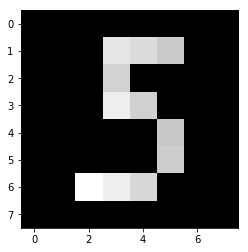

In [31]:
# step-1: convert into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Not Operation
gray_inv = cv2.bitwise_not(gray)
# step -3 : Resize your image
gray_rezie = cv2.resize(gray_inv,(8,8))
# step -4: Reshape
test = gray_rezie.reshape((1,64))
# step -5: Normalize
test_img = test/test.max()

plt.imshow(gray_rezie,cmap='gray')

In [34]:
test_img*16

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 14.36444444, 13.79555556, 12.72888889,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 13.15555556,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 14.93333333, 13.01333333,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 12.51555556,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        12.87111111,  0.        ,  0.        ,  0.        ,  0.        ,
        16.        , 14.93333333, 13.44      ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [42]:
model.predict(test_img*15)

array([1])

In [43]:
model.predict_proba(test_img*15)

array([[0. , 0.4, 0. , 0. , 0.2, 0.4, 0. , 0. , 0. , 0. ]])

In [33]:
test_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.89777778, 0.86222222, 0.79555556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.82222222,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.93333333, 0.81333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.78222222, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.80444444, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.93333333, 0.84      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [36]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])